# Introduction

### Problem Description
Given dataset contains data of tweets on various airline’s twitter handles.

It contains a total of 12 columns, out of which one column specifies the sentiment of the tweet. All other columns provide various information related to what was the tweet, where was it posted from, when was it posted, it's retweeted; etc.

My task was to build a machine learning / deep learning model to predict the sentiment of the tweet using all or some of the other given columns

### Data Description
Description of columns of the dataset is given below -

tweet_id -- Id of the tweet

airline_sentiment -- Sentiment of the tweet (Target variable)

airline_sentiment_confidence -- Confidence with which the given sentiment was determined

negativereason_confidence -- Confidence with which the negative reason of tweet was predicted

name -- Name of the person who tweeted

retweet_count -- Number of retweets

text -- Text of the tweet whose sentiment has to be predicted

tweet_created -- Time at which the tweet was created

tweet_location -- Location from where the tweet was posted

user_timezone -- Time zone from where the tweet was posted

negativereason -- Reason for which user posted a negative tweet

airline -- Airline for which the tweet was posted

## Content
1. Introduction
2. Data Injection
3. Data Visualisation
4. Preprocessing
5. Training                                                                                                                                                                                                                                                            
5.1. Logistic Regression                                                                                                                                                                                                                                      
5.2.Artificial Neural Network
6. Evaluation with graph

# Data Injection

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
data=pd.read_csv("../input/train.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Vizualizing Data

In [3]:
#looking for null values
(len(data)-data.count())/len(data)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.360886
negativereason_confidence       0.266247
airline                         0.000299
name                            0.000299
retweet_count                   0.000299
text                            0.000299
tweet_created                   0.028751
tweet_location                  0.305481
user_timezone                   0.331836
dtype: float64

In [4]:
#Visualizing the Data
data.groupby(['airline_sentiment']).size()

airline_sentiment
negative    2135
neutral      679
positive     525
dtype: int64

In [5]:
data.groupby(['airline']).size()

airline
United            2884
Virgin America     454
dtype: int64

## Visualizing with Graph

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

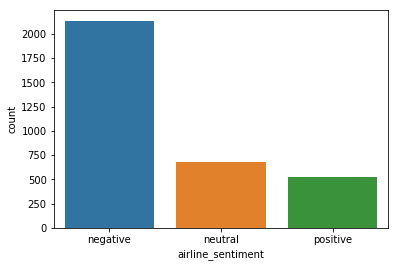

In [7]:
sns.countplot(x='airline_sentiment',data=data,order=['negative','neutral','positive'])
plt.show()

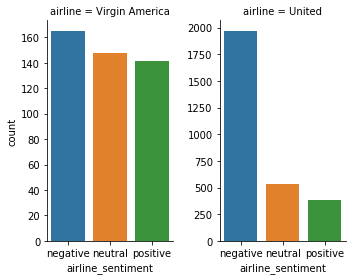

In [8]:
#Visualizing 'airline_sentiment' and 'airline'
sns.factorplot(x = 'airline_sentiment',data=data,
               order = ['negative','neutral','positive'],kind = 'count',col_wrap=3,col='airline',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

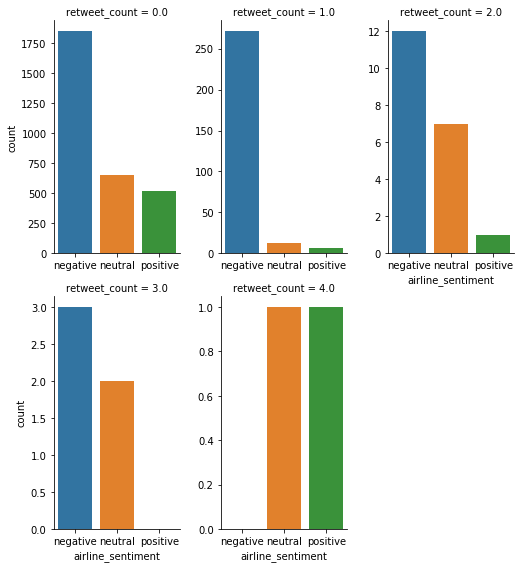

In [9]:
# Visualizing 'airlinee_sentiment' and 'tweet_count'
sns.factorplot(x= 'airline_sentiment',data=data,
              order=['negative','neutral','positive'],kind = 'count',col_wrap=3,col='retweet_count',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

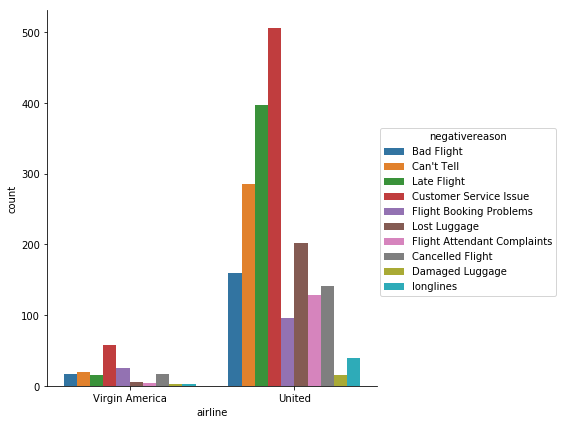

In [10]:
#Visualizing 'negativereason' and 'airline'
sns.factorplot(x = 'airline',data=data,
               order = ['Virgin America','United'],kind ='count',hue='negativereason',size=6,aspect=0.9)
plt.show()

# Preprocessing

In [11]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
data=data.drop(["tweet_id",
           "airline",
           "name",
           "retweet_count",
           "tweet_created",
           "tweet_location",
           "user_timezone"],axis=1)


In [13]:
#remove words which are starts with @ symbols
data['text'] = data['text'].map(lambda x:re.sub('@\w*','',str(x)))
#remove link starts with https
data['text'] = data['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
data['text'] = data['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing special characters
data['text'] = data['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))


## Getting important numeric and non numeric data
1. Appending negative reason to text
2. For data['negativereason'] i have removed the NaN values by 0 in 'negativereason' and placed 1 in place of vaild negative reason.
3. For data['negativereason_confidence'] the values are between 0 to 1 higher the values more its chances to be a 'negative' tweet lower the values more its chances to be 'positive' or 'neutral' tweet.
so replacing the NaN by value near to zero

In [14]:
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,text
0,neutral,1.0000,NaN,NaN,What said.
1,positive,0.3486,NaN,0.0000,plus you've added commercials to the experien...
2,neutral,0.6837,NaN,NaN,I didn't today... Must mean I need to take an...
3,negative,1.0000,Bad Flight,0.7033,"it's really aggressive to blast obnoxious ""en..."
4,negative,1.0000,Can't Tell,1.0000,and it's a really big bad thing about it


In [15]:
#appending negative reason to text
data=data.values
for i in range(3339):
    if not str(data[i][2])=="nan":
        data[i][4]=str(data[i][4])+" "+ str(data[i][2])

In [16]:
#Getting important numeric data 
for i in range(3339):
    if str(data[i][2])=="nan":
        data[i][2]=0
    if str(data[i][3])=="nan":
        data[i][3]=0.3
for i in range(3339):
    if not str(data[i][2])=='0':
        data[i][2]=1


In [17]:
data=pd.DataFrame(data=data,columns=["airline_sentiment","airline_sentiment_confidence","negativereason","negativereason_confidence","text"])
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,text
0,neutral,1,0,0.3,What said.
1,positive,0.3486,0,0,plus you've added commercials to the experien...
2,neutral,0.6837,0,0.3,I didn't today... Must mean I need to take an...
3,negative,1,1,0.7033,"it's really aggressive to blast obnoxious ""en..."
4,negative,1,1,1,and it's a really big bad thing about it Can'...


In [18]:
#preparing train data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=data['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop)])))
tfid=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
x_features=tfid.fit_transform(text).toarray()

In [19]:
#preparing target variable
y=data['airline_sentiment']
y=pd.DataFrame(y,columns=['airline_sentiment'])
y = y['airline_sentiment'].map({'neutral':1,'negative':2,'positive':0})

# Training

## Logistic Regression

In [20]:
#training with Logistic Regression
from sklearn.linear_model import LogisticRegression as lg
from sklearn.model_selection import cross_val_score

In [21]:
clf=lg()
acc=cross_val_score(estimator=clf,X=x_features,y=y,cv=5)
acc

array([0.84431138, 0.85179641, 0.83383234, 0.84131737, 0.87106447])

In [22]:
#calculating accuracy after adding three more numerical parameters 'negativereason','negativereason_confidence', and 'airline_sentiment_confidence'.
#Note that we have transformed that earlier
#emmbading numerical data in x_features
x_features=pd.DataFrame(x_features)
x_features.loc[:,'a']=data.iloc[:,1].values
x_features.loc[:,'b']=data.iloc[:,2].values
x_features.loc[:,'c']=data.iloc[:,3].values

In [23]:
#training our new data
clf=lg()
acc=cross_val_score(estimator=clf,X=x_features,y=y,cv=5)
acc

array([0.90419162, 0.89221557, 0.90568862, 0.92365269, 0.91754123])

#### As you can clearly see the accuracy is increased by a desent margin

##  Artificial Neural Network

In [24]:
#lets dig deeper and apply Deep learning for better accuracy
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
# Transforming our target vatiable
from sklearn.preprocessing import OneHotEncoder

In [27]:
onehotencoder=OneHotEncoder()
target=y.values
target=target.reshape(-1,1)
target=onehotencoder.fit_transform(target).toarray()

In [28]:
target=pd.DataFrame(data=target,columns=['positive','neutral','negative'])
target.head()

,positive,neutral,negative
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [33]:
clf=Sequential()
#adding layers to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=6212))
clf.add(Dropout(0.5))
#adding two more hidden layer to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
#adding output layer
clf.add(Dense(units=3,activation="softmax",kernel_initializer="uniform"))
#compiling ANN
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting ANN
hist=clf.fit(x_features,target,batch_size=32,epochs=10)


Epoch 1/10
3339/3339 [==============================] - 16s 5ms/step - loss: 3.9085 - acc: 0.8482
Epoch 2/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.4081 - acc: 0.9365
Epoch 3/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.2759 - acc: 0.9602
Epoch 4/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.2195 - acc: 0.9790
Epoch 5/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.2181 - acc: 0.9745
Epoch 6/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.2034 - acc: 0.9808
Epoch 7/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.1918 - acc: 0.9826
Epoch 8/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.1813 - acc: 0.9847
Epoch 9/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.1638 - acc: 0.9898
Epoch 10/10
3339/3339 [==============================] - 14s 4ms/step - loss: 0.1647 - acc: 0.9844


# Evaluation with Graph

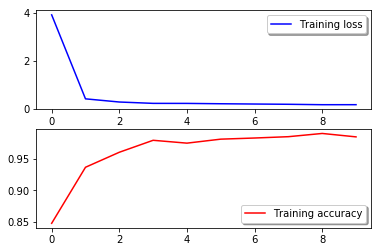

In [34]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['acc'], color='r', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Thank you for your visit and plzz upvote it if like it. 